### Explore data

In [4]:
import pandas as pd

pm10 = pd.read_excel("../../data/AirQuality_Krakow/2019_PM10_1g.xlsx")
pm10.head()

,DateTime,MpKrakAlKras,MpKrakBujaka,MpKrakBulwar,MpKrakOsPias,MpKrakSwoszo,MpKrakWadow,MpKrakZloRog
0,2019-01-01 01:00:00,88.2185,139.7900,120.0570,161.0530,NaN,83.6841,77.8355
1,2019-01-01 02:00:00,95.2209,92.5099,63.4217,62.3289,NaN,66.3402,82.9678
2,2019-01-01 03:00:00,85.3689,57.1358,48.6426,56.5202,NaN,55.8833,64.5276
3,2019-01-01 04:00:00,70.8575,39.4615,36.7828,49.5539,NaN,44.1614,46.5672
4,2019-01-01 05:00:00,50.1935,27.1423,28.7538,36.1824,NaN,34.5853,48.1257


### Note about data set air quality

In [5]:
print("Data shape:", pm10.shape)
print(f"Statistic: {pm10.describe()}")
print("\nColumns:", pm10.columns.tolist())
print("\nData types:")
print(pm10.dtypes)
print("\nFirst few timestamps:")
print(pm10['DateTime'].head())
print("\nDate range:")
print(f"From: {pm10['DateTime'].min()}")
print(f"To: {pm10['DateTime'].max()}")

Data shape: (8760, 8)
Statistic:                   DateTime  MpKrakAlKras  MpKrakBujaka  MpKrakBulwar  \
count                 8760   8730.000000   8655.000000   8712.000000   
mean   2019-07-02 12:30:00     49.453956     34.761797     32.751912   
min    2019-01-01 01:00:00      3.446220      3.000000      3.000000   
25%    2019-04-02 06:45:00     26.605000     16.841850     16.027325   
50%    2019-07-02 12:30:00     39.768750     25.826100     24.614750   
75%    2019-10-01 18:15:00     62.136950     41.876350     41.524600   
max    2020-01-01 00:00:00    251.398000    222.938000    349.811000   
std                    NaN     33.578147     28.920883     25.066072   

       MpKrakOsPias  MpKrakSwoszo  MpKrakWadow  MpKrakZloRog  
count   8606.000000   8384.000000  8691.000000   8482.000000  
mean      31.020584     30.735291    28.883373     34.862077  
min        3.000000      3.000000     2.997050      3.000000  
25%       15.792450     15.289300    14.253700     17.422300  
50%

### Explore Station data


In [6]:

stations_df = pd.read_excel("../../data/AirQuality_Krakow/Stations.xlsx")
print("Station information:")
print(f"Number of stations: {len(stations_df)}")
print("\nStation columns:", stations_df.columns.tolist())
print("\nStation details:")
stations_df

Station information:
Number of stations: 7

Station columns: ['Station Code', 'International Code', 'Street address', 'Area Type', 'Station Category', 'WGS84 φ N', 'WGS84 λ E']

Station details:


,Station Code,International Code,Street address,Area Type,Station Category,WGS84 φ N,WGS84 λ E
0,MpKrakAlKras,PL0012A,"Kraków, Aleja Krasińskiego",urban,stationary container unit,50.057678,19.926189
1,MpKrakBujaka,PL0501A,"Kraków, ul. Bujaka",urban,stationary container unit,50.010575,19.949189
2,MpKrakBulwar,PL0039A,"Kraków, ul. Bulwarowa",urban,stationary container unit,50.069308,20.053492
3,MpKrakOsPias,PL0642A,"Kraków, os. Piastów",urban,free-standing dust sampler,50.098508,20.018269
4,MpKrakSwoszo,PL0735A,"Kraków, os. Swoszowice",urban,free-standing dust sampler,49.991442,19.936792
5,MpKrakWadow,PL0670A,"Kraków, os. Wadów",urban,stationary container unit,50.100569,20.122561
6,MpKrakZloRog,PL0643A,"Kraków, ul. Złoty Róg",urban,free-standing dust sampler,50.081197,19.895358


### Explore Weather data

In [7]:
weather_df = pd.read_csv("../../data/Weather_Krakow/2020.csv")
weather_df.head()
# weather_df.columns
# print(f"Basis statistic: {weather_df.describe()}")
print(f"colums: {weather_df.columns}")

colums: Index(['STATION', 'DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG',
       'VIS', 'TMP', 'DEW', 'SLP', 'AA1', 'AA2', 'AJ1', 'AY1', 'AY2', 'AZ1',
       'AZ2', 'GA1', 'GA2', 'GA3', 'GE1', 'GF1', 'IA1', 'IA2', 'KA1', 'KA2',
       'MA1', 'MD1', 'MW1', 'MW2', 'OC1', 'OD1', 'OD2', 'OD3', 'REM', 'EQD'],
      dtype='object')


C:\Users\Win10\AppData\Local\Temp\ipykernel_20140\3396967097.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_df = pd.read_csv("../../data/Weather_Krakow/2020.csv")


# Preprocess data

1. Load the data
2. Data quaility check
3. Data cleaning and preprocessing
4. Save the process data

## Preprocess Weather data
1. Fill missing dates 
2. Fill missing values
3. Creates additionals features
4. Crate dummy features

In [8]:
from pathlib import Path


def load_all_weather_data():
    weather_dir = Path("../../data/Weather_Krakow")
    weather_files = ["2019.csv", "2020.csv", "2021.csv", "2022.csv", "2023.csv"]
    
    all_weather = []
    
    for file in weather_files:
        file_path = weather_dir / file
        if file_path.exists():
            print(f"Loading weather {file}...")
            df = pd.read_csv(file_path, low_memory=False)
            df['DATE'] = pd.to_datetime(df['DATE'])
            all_weather.append(df)
        else:
            print(f"{file} not found")
    
    if all_weather:
        combined_df = pd.concat(all_weather, ignore_index=True)
        combined_df = combined_df.sort_values('DATE').reset_index(drop=True)
        return combined_df
    else:
        return None


weather_all_data = load_all_weather_data()


Loading weather 2019.csv...
Loading weather 2020.csv...
Loading weather 2021.csv...
Loading weather 2022.csv...
Loading weather 2023.csv...


In [9]:
weather_all_data['STATION'].duplicated().sum()
# len(weather_all_data)

np.int64(130327)

In [10]:
# Fill missing date
# builds complete hourly time series data from start to end weather data 
# ensure to get consistentcy hourly weather entries 
weather_df = pd.DataFrame()
weather_df['DATE'] = pd.date_range(
    start=weather_all_data.iloc[0]['DATE'], 
    end=weather_all_data.iloc[-1]['DATE'], 
    freq='H'
)
weather_df = pd.merge(weather_df, weather_all_data.iloc[:, 1:], on=['DATE'], how='left')
weather_df.head()



C:\Users\Win10\AppData\Local\Temp\ipykernel_20140\2466914696.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_df['DATE'] = pd.date_range(


,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,WND,...,MW1,MW2,MW3,OC1,OD1,OD2,OD3,REM,EQD,IA2
0,2019-01-01 00:00:00,4.0,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999.0,V020,"240,1,N,0030,1",...,"10,1",NaN,NaN,NaN,NaN,NaN,NaN,SYN08212566 11556 82403 10001 21009 39996 4030...,NaN,NaN
1,2019-01-01 00:00:00,4.0,50.077731,19.784836,241.09,"BALICE, PL",FM-15,99999.0,V020,"240,1,N,0026,1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET060METAR EPKK 010000Z 24005KT 6000 FEW021 B...,NaN,NaN
2,2019-01-01 01:00:00,4.0,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999.0,V020,"220,1,N,0030,1",...,"10,1",NaN,NaN,NaN,NaN,NaN,NaN,SYN08612566 41556 82203 10008 21008 39994 4029...,NaN,NaN
3,2019-01-01 01:00:00,4.0,50.077731,19.784836,241.09,"BALICE, PL",FM-15,99999.0,V020,"220,1,N,0031,1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET052METAR EPKK 010100Z 22006KT 6000 BKN020 0...,NaN,NaN
4,2019-01-01 02:00:00,4.0,50.077731,19.784836,241.09,"BALICE, PL",FM-12,99999.0,V020,"210,1,N,0040,1",...,"10,1",NaN,NaN,NaN,NaN,NaN,NaN,SYN08012566 41556 52104 10008 21010 39981 4028...,NaN,NaN


In [11]:
weather_all_data['STATION'].duplicated().sum

<bound method Series.sum of 0         False
1          True
2          True
3          True
4          True
          ...  
130323     True
130324     True
130325     True
130326     True
130327     True
Name: STATION, Length: 130328, dtype: bool>

Adjust the missing values then save the data

In [12]:
import numpy as np

invalid_values = ["99999", "99999.0", "99999.9", "9999", "999.9", "+99999", "+9999", "-9999", "-9999.9", "99", "99999,9"]

def clean_invalid(val):
    val_str = str(val)
    
    for invalid in invalid_values:
        if invalid in val_str:
            return np.nan
    return val  

weather_df = weather_df.applymap(clean_invalid)

weather_df.head()


C:\Users\Win10\AppData\Local\Temp\ipykernel_20140\681957495.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weather_df = weather_df.applymap(clean_invalid)


,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,WND,...,MW1,MW2,MW3,OC1,OD1,OD2,OD3,REM,EQD,IA2
0,2019-01-01 00:00:00,4.0,50.077731,19.784836,241.09,"BALICE, PL",FM-12,NaN,V020,"240,1,N,0030,1",...,"10,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01 00:00:00,4.0,50.077731,19.784836,241.09,"BALICE, PL",FM-15,NaN,V020,"240,1,N,0026,1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET060METAR EPKK 010000Z 24005KT 6000 FEW021 B...,NaN,NaN
2,2019-01-01 01:00:00,4.0,50.077731,19.784836,241.09,"BALICE, PL",FM-12,NaN,V020,"220,1,N,0030,1",...,"10,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01 01:00:00,4.0,50.077731,19.784836,241.09,"BALICE, PL",FM-15,NaN,V020,"220,1,N,0031,1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET052METAR EPKK 010100Z 22006KT 6000 BKN020 0...,NaN,NaN
4,2019-01-01 02:00:00,4.0,50.077731,19.784836,241.09,"BALICE, PL",FM-12,NaN,V020,"210,1,N,0040,1",...,"10,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Change all of the columns to lowercase 
weather_df.columns = weather_df.columns.str.lower()
print(weather_df.dtypes)


date               datetime64[ns]
source                    float64
latitude                  float64
longitude                 float64
elevation                 float64
name                       object
report_type                object
call_sign                 float64
quality_control            object
wnd                        object
cig                        object
vis                        object
tmp                        object
dew                        object
slp                        object
aa1                        object
aa2                        object
aj1                        object
ay1                        object
ay2                        object
az1                        object
az2                        object
ed1                       float64
ga1                        object
ga2                        object
ga3                        object
ge1                       float64
gf1                       float64
ia1                        object
ka1           

Preprocess date time data and fill na using Forward and Backward fill methods

In [14]:
from sklearn import preprocessing

weather_df['date'] = pd.to_datetime(weather_df['date'])


weather_df['year'] = weather_df['date'].dt.year
weather_df['dayofyear'] = weather_df['date'].dt.dayofyear
weather_df['hour'] = weather_df['date'].dt.hour
weather_df['week'] = weather_df['date'].dt.isocalendar().week



for col in ['year', 'dayofyear', 'hour']:
    weather_df[col] = weather_df[col].fillna(method="ffill").fillna(method="bfill")
    le = preprocessing.LabelEncoder()
    weather_df[col] = le.fit_transform(weather_df[col])

# year, day of year and hour is lable encoder 

C:\Users\Win10\AppData\Local\Temp\ipykernel_20140\4070561917.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_df[col] = weather_df[col].fillna(method="ffill").fillna(method="bfill")
C:\Users\Win10\AppData\Local\Temp\ipykernel_20140\4070561917.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_df[col] = weather_df[col].fillna(method="ffill").fillna(method="bfill")
C:\Users\Win10\AppData\Local\Temp\ipykernel_20140\4070561917.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_df[col] = weather_df[col].fillna(method="ffill").fillna(method="bfill")


In [15]:
cat_feat = [
    'name',
    'report_type',
    'quality_control',
    'wnd',
    'cig',
    'vis',
    'tmp',
    'dew',
    'slp',
    'aa1', 'aa2',
    'aj1',
    'ay1', 'ay2',
    'az1', 'az2',
    'ed1',
    'ga1', 'ga2', 'ga3',
    'ge1',
    'gf1',
    'ia1', 'ia2',
    'ka1', 'ka2',
    'ma1',
    'md1',
    'mw1', 'mw2', 'mw3',
    'oc1',
    'od1', 'od2', 'od3',
    'rem',
    'eqd'
]


In [16]:
for col in cat_feat:
    if weather_df[col].isnull().sum() > 0:
        weather_df[col] = weather_df.groupby(['week', 'hour'])[col] \
            .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))


C:\Users\Win10\AppData\Local\Temp\ipykernel_20140\3082730837.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))


In [17]:
weather_df.drop(columns=['latitude', 'longitude'], inplace=True)
weather_df.dropna
weather_df.head()

,date,source,elevation,name,report_type,call_sign,quality_control,wnd,cig,vis,...,od1,od2,od3,rem,eqd,ia2,year,dayofyear,hour,week
0,2019-01-01 00:00:00,4.0,241.09,"BALICE, PL",FM-12,NaN,V020,"240,1,N,0030,1","22000,1,9,N","006000,1,9,9",...,NaN,NaN,NaN,MET046METAR EPKK 310000Z 23009KT CAVOK 03/M03 ...,Q01 003SCCGA1,NaN,0,0,0,1
1,2019-01-01 00:00:00,4.0,241.09,"BALICE, PL",FM-15,NaN,V020,"240,1,N,0026,1","00884,1,9,N","006000,1,9,9",...,NaN,NaN,NaN,MET060METAR EPKK 010000Z 24005KT 6000 FEW021 B...,Q01 003SCCGA1,NaN,0,0,0,1
2,2019-01-01 01:00:00,4.0,241.09,"BALICE, PL",FM-12,NaN,V020,"220,1,N,0030,1","22000,1,9,N","006000,1,9,9",...,NaN,NaN,NaN,MET046METAR EPKK 310100Z 24008KT CAVOK 03/M04 ...,Q01 003SCCGA1,NaN,0,0,1,1
3,2019-01-01 01:00:00,4.0,241.09,"BALICE, PL",FM-15,NaN,V020,"220,1,N,0031,1","00610,1,C,N","006000,1,9,9",...,NaN,NaN,NaN,MET052METAR EPKK 010100Z 22006KT 6000 BKN020 0...,Q01 003SCCGA1,NaN,0,0,1,1
4,2019-01-01 02:00:00,4.0,241.09,"BALICE, PL",FM-12,NaN,V020,"210,1,N,0040,1","22000,1,9,N","006000,1,9,9",...,NaN,NaN,NaN,MET046METAR EPKK 310200Z 24007KT CAVOK 03/M04 ...,Q01 003SCCGA1,NaN,0,0,2,1


In [18]:
cont_vars = weather_df.select_dtypes(include=[np.number]).columns.tolist()

for col in cont_vars:
    if weather_df[col].isnull().sum(axis=0) > 0:
        weather_df[col] = weather_df.groupby(['year', 'week', 'hour'])[col].transform(lambda x: x.fillna(x.mean()))
        weather_df[col] = weather_df.groupby (['dayofyear', 'hour'])[col].transform(lambda x: x.fillna(x.mean()))
        weather_df[col] = weather_df[col].fillna(weather_df[col].rolling(4, min_periods=1).mean())

In [19]:
weather_df = weather_df.dropna(axis=1, how="any") 

In [20]:
def additional_features(df):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['dayofweek'] = df['date'].dt.dayofweek
    df['hour'] = df['date'].dt.hour
    df['day'] = df['date'].dt.day
    df['dayofyear'] = df['date'].dt.dayofyear
    df['week'] = df['date'].dt.isocalendar().week

    df['month_dummy'] = 0
    df.loc[df['month'] > 10, 'month_dummy'] = 1
    df.loc[df['month'] < 3, 'month_dummy'] = 1

    df['hour_dummy'] = 0
    df.loc[(df['month_dummy'] == 1) & (df['hour'] > 19) & (df['hour'] < 23), 'hour_dummy'] = 1
    df.loc[(df['month_dummy'] == 1) & (df['hour'] > 5) & (df['hour'] < 9), 'hour_dummy'] = 1

    df['day_dummy'] = 0
    df.loc[(df['hour'] > 9) & (df['hour'] < 19), 'day_dummy'] = 1

    return df

weather_df = additional_features(weather_df)




In [21]:
weather_df.columns

Index(['date', 'source', 'elevation', 'name', 'report_type', 'quality_control',
       'wnd', 'cig', 'vis', 'tmp', 'dew', 'slp', 'ga1', 'rem', 'year',
       'dayofyear', 'hour', 'week', 'month', 'dayofweek', 'day', 'month_dummy',
       'hour_dummy', 'day_dummy'],
      dtype='object')

### Preprocess Air Quality data

In [22]:
def load_all_pm10_data():
    data_dir = Path("../../data/AirQuality_Krakow")
    pm10_files = [
        "2019_PM10_1g.xlsx",
        "2020_PM10_1g.xlsx", 
        "2021_PM10_1g.xlsx",
        "2022_PM10_1g.xlsx",
        "2023_PM10_1g.xlsx"
    ]
    
    all_data = []
    
    for file in pm10_files:
        file_path = data_dir / file
        if file_path.exists():
            print(f"Loading {file}...")
            df = pd.read_excel(file_path)
            df['DateTime'] = pd.to_datetime(df['DateTime'])
            all_data.append(df)
         
        else:
            print(f"Warning: {file} not found")
    
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        combined_df = combined_df.sort_values('DateTime').reset_index(drop=True)
        return combined_df
    else:
        return None

pm10_all_years = load_all_pm10_data()

Loading 2019_PM10_1g.xlsx...
Loading 2020_PM10_1g.xlsx...
Loading 2021_PM10_1g.xlsx...


Loading 2022_PM10_1g.xlsx...
Loading 2023_PM10_1g.xlsx...


In [23]:
pm10.head()
pm10.describe()
print(pm10.isna().sum())
print(len(pm10))

DateTime          0
MpKrakAlKras     30
MpKrakBujaka    105
MpKrakBulwar     48
MpKrakOsPias    154
MpKrakSwoszo    376
MpKrakWadow      69
MpKrakZloRog    278
dtype: int64
8760


In [24]:
# fill na của pm10 bằng cách nội suy tuyến tính, set date, time làm index 
pm10_all_years = pm10_all_years.set_index('DateTime')
pm10_all_years = pm10_all_years.interpolate(method='time')
pm10_all_years = pm10_all_years.reset_index()

In [25]:
# pm10 = pm10[(pm10['DateTime'] >= start) & (pm10['DateTime'] <= end)]
# weather_all_data = weather_all_data[(weather_all_data['DATE'] >= start) & (weather['DATE'] <= end)]


In [26]:
# drop MpKrakSwoszo columns in pm10_all_years
pm10_all_years = pm10_all_years.drop(columns=["MpKrakSwoszo"])



In [27]:
pm10_all_years.head()

,DateTime,MpKrakAlKras,MpKrakBujaka,MpKrakBulwar,MpKrakOsPias,MpKrakWadow,MpKrakZloRog
0,2019-01-01 01:00:00,88.2185,139.7900,120.0570,161.0530,83.6841,77.8355
1,2019-01-01 02:00:00,95.2209,92.5099,63.4217,62.3289,66.3402,82.9678
2,2019-01-01 03:00:00,85.3689,57.1358,48.6426,56.5202,55.8833,64.5276
3,2019-01-01 04:00:00,70.8575,39.4615,36.7828,49.5539,44.1614,46.5672
4,2019-01-01 05:00:00,50.1935,27.1423,28.7538,36.1824,34.5853,48.1257


### Detect outliers
detect outliers in PM10 data using boxplot

```python

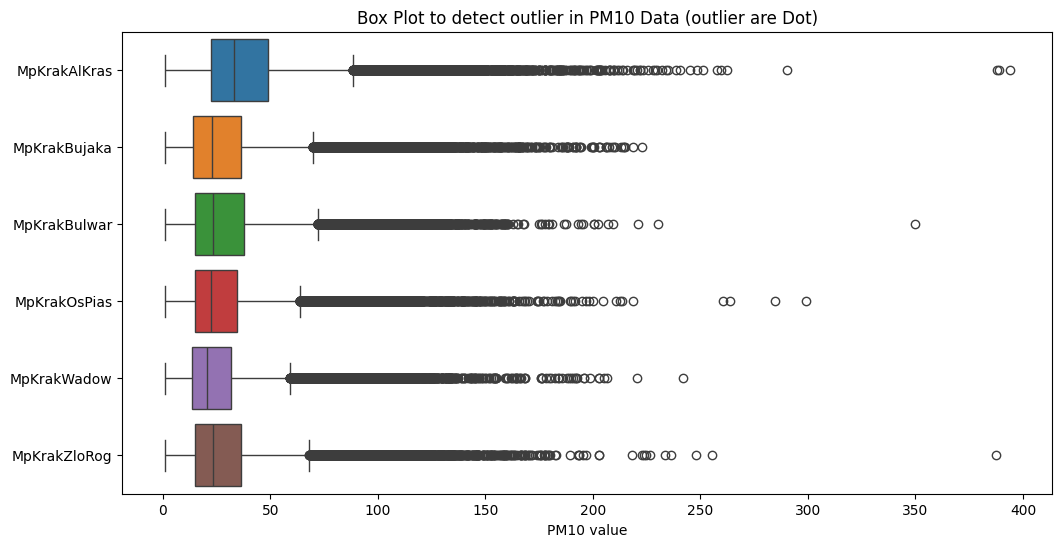

MpKrakAlKras: 2456 outliers (5.60%)
MpKrakBujaka: 3039 outliers (6.93%)
MpKrakBulwar: 2786 outliers (6.36%)
MpKrakOsPias: 3030 outliers (6.91%)
MpKrakWadow: 3045 outliers (6.95%)
MpKrakZloRog: 2950 outliers (6.73%)


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

station_cols = ['MpKrakAlKras', 'MpKrakBujaka', 'MpKrakBulwar', 'MpKrakOsPias', 
                'MpKrakWadow', 'MpKrakZloRog']  


plt.figure(figsize=(12, 6))
sns.boxplot(data=pm10_all_years[station_cols], orient="h")
plt.title("Box Plot to detect outlier in PM10 Data (outlier are Dot)")
plt.xlabel("PM10 value")
plt.show()

for col in station_cols:
    Q1 = pm10_all_years[col].quantile(0.25)
    Q3 = pm10_all_years[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = pm10_all_years[(pm10_all_years[col] < lower) | (pm10_all_years[col] > upper)][col]
    print(f"{col}: {len(outliers)} outliers ({100*len(outliers)/len(pm10_all_years):.2f}%)")

### Remove outliers
after detecting outliers, we not remove from this dataset since it is time series data so it just replace using interpolation method
```python

In [29]:
import numpy as np
def replace_outliers_iqr_interpolate(df, cols):
    clean_df = df.copy()
    for col in cols:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        clean_df[col] = clean_df[col].mask(
            (clean_df[col] < lower_bound) | (clean_df[col] > upper_bound),np.nan)

        clean_df[col] = clean_df[col].interpolate(method='linear', limit_direction='both')
    
    return clean_df

pm10_cols = ['MpKrakAlKras', 'MpKrakBujaka', 'MpKrakBulwar',
             'MpKrakOsPias', 'MpKrakWadow', 'MpKrakZloRog']

pm10_all_years_clean = replace_outliers_iqr_interpolate(pm10_all_years, pm10_cols)




### After oulier removal

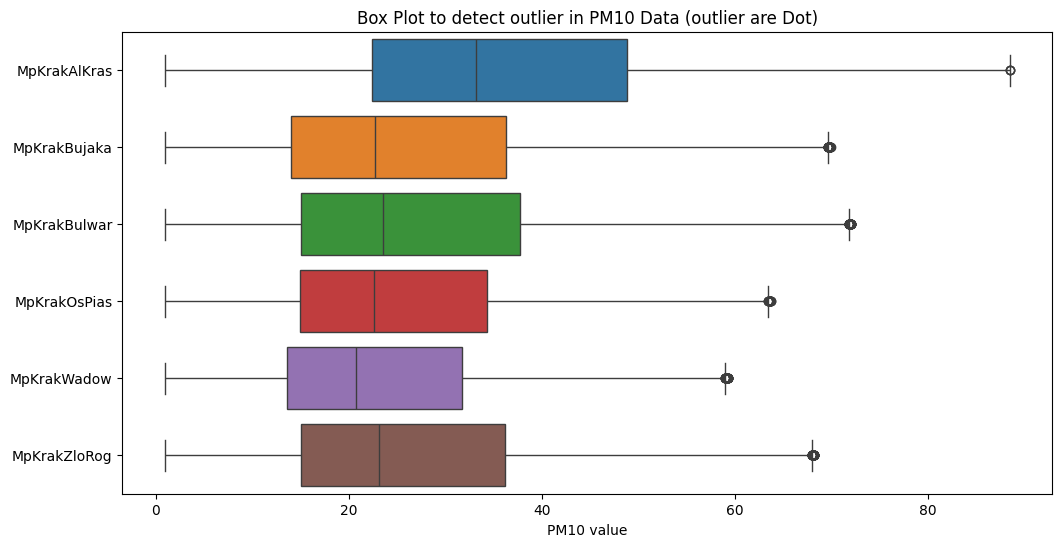

MpKrakAlKras: 3 outliers (0.01%)
MpKrakBujaka: 59 outliers (0.13%)
MpKrakBulwar: 53 outliers (0.12%)
MpKrakOsPias: 30 outliers (0.07%)
MpKrakWadow: 41 outliers (0.09%)
MpKrakZloRog: 39 outliers (0.09%)


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

station_cols = ['MpKrakAlKras', 'MpKrakBujaka', 'MpKrakBulwar', 'MpKrakOsPias', 
                'MpKrakWadow', 'MpKrakZloRog']  


plt.figure(figsize=(12, 6))
sns.boxplot(data=pm10_all_years_clean[station_cols], orient="h")
plt.title("Box Plot to detect outlier in PM10 Data (outlier are Dot)")
plt.xlabel("PM10 value")
plt.show()

for col in station_cols:
    Q1 = pm10_all_years_clean[col].quantile(0.25)
    Q3 = pm10_all_years_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = pm10_all_years_clean[(pm10_all_years_clean[col] < lower) | (pm10_all_years_clean[col] > upper)][col]
    print(f"{col}: {len(outliers)} outliers ({100*len(outliers)/len(pm10_all_years):.2f}%)")

### Merge data


In [31]:


if 'date' in weather_df.columns:
    weather_df = weather_df.rename(columns={'date': 'DateTime'})
elif 'DateTime' not in weather_df.columns:
    print("ERROR: No date column found in weather_df")




pm10_all_years_clean['DateTime'] = pd.to_datetime(pm10_all_years_clean['DateTime'])
weather_df['DateTime'] = pd.to_datetime(weather_df['DateTime'])

print("After cleanup - Weather columns:", weather_df.columns.tolist())


merged_data = pd.merge(pm10_all_years_clean, weather_df, on='DateTime', how='inner')
print(f"Merged data shape: {merged_data.shape}")
print("Merged columns:", merged_data.columns.tolist()[:10])


pm10_cols = ['MpKrakAlKras', 'MpKrakBujaka', 'MpKrakBulwar', 'MpKrakOsPias', 'MpKrakWadow', 'MpKrakZloRog']


id_vars_raw = ['DateTime'] + [col for col in merged_data.columns if col not in pm10_cols]
id_vars = list(dict.fromkeys(id_vars_raw))  

print(f"ID vars (first 5): {id_vars[:5]}")
print(f"Total ID vars: {len(id_vars)}")

final_data = merged_data.melt(
    id_vars=id_vars,
    value_vars=pm10_cols,
    var_name='station_code',
    value_name='pm10'
)

station_mapping = {
    'MpKrakAlKras': 'AlKras',
    'MpKrakBujaka': 'Bujaka', 
    'MpKrakBulwar': 'Bulwar',
    'MpKrakOsPias': 'OsPias',
    'MpKrakWadow': 'Wadow',
    'MpKrakZloRog': 'ZloRog'
}

final_data['station_code'] = final_data['station_code'].map(station_mapping)

station_coordinates = {
    'AlKras': {'latitude': 50.0647, 'longitude': 19.9450},
    'Bujaka': {'latitude': 50.0101, 'longitude': 19.9493},
    'Bulwar': {'latitude': 50.0695, 'longitude': 19.9063},
    'OsPias': {'latitude': 50.0920, 'longitude': 19.9559},
    'Wadow': {'latitude': 50.0570, 'longitude': 19.8869},
    'ZloRog': {'latitude': 50.0305, 'longitude': 20.0163}
}

final_data['latitude'] = final_data['station_code'].map(lambda x: station_coordinates.get(x, {}).get('latitude'))
final_data['longitude'] = final_data['station_code'].map(lambda x: station_coordinates.get(x, {}).get('longitude'))

# final_data = final_data.dropna(subset=['pm10', 'latitude', 'longitude'])
# final_data = final_data.sort_values(['station_code', 'DateTime']).reset_index(drop=True)


After cleanup - Weather columns: ['DateTime', 'source', 'elevation', 'name', 'report_type', 'quality_control', 'wnd', 'cig', 'vis', 'tmp', 'dew', 'slp', 'ga1', 'rem', 'year', 'dayofyear', 'hour', 'week', 'month', 'dayofweek', 'day', 'month_dummy', 'hour_dummy', 'day_dummy']
Merged data shape: (75719, 30)
Merged columns: ['DateTime', 'MpKrakAlKras', 'MpKrakBujaka', 'MpKrakBulwar', 'MpKrakOsPias', 'MpKrakWadow', 'MpKrakZloRog', 'source', 'elevation', 'name']
ID vars (first 5): ['DateTime', 'source', 'elevation', 'name', 'report_type']
Total ID vars: 24


In [32]:
# from sklearn.preprocessing import LabelEncoder

# categorical_cols = final_data.select_dtypes(include=['object', 'category']).columns

# label_encoder = LabelEncoder()
# for col in categorical_cols:
#     final_data[col] = label_encoder.fit_transform(final_data[col].astype(str))


In [33]:
# correlation_matrix = final_data.corr()
# pm10_corr = correlation_matrix["pm10"].drop("pm10").abs().sort_values(ascending=False)
# print("Top features correlated with PM10:")
# print(pm10_corr)


In [34]:
final_data.dtypes

DateTime           datetime64[ns]
source                    float64
elevation                 float64
name                       object
report_type                object
quality_control            object
wnd                        object
cig                        object
vis                        object
tmp                        object
dew                        object
slp                        object
ga1                        object
rem                        object
year                        int32
dayofyear                   int32
hour                        int32
week                       UInt32
month                       int32
dayofweek                   int32
day                         int32
month_dummy                 int64
hour_dummy                  int64
day_dummy                   int64
station_code               object
pm10                      float64
latitude                  float64
longitude                 float64
dtype: object

In [35]:
# kiem tra cac cot nhieu duplicate khi merge data
print(final_data.duplicated(['source']).sum())
print(final_data.duplicated(['elevation']).sum())
print(final_data.duplicated(['name']).sum())
print(final_data.duplicated(['quality_control']).sum())


len(final_data)

final_data.drop(columns=['source','elevation','name', 'quality_control'], inplace=True)

454313
454311
454313
454313


In [36]:
import pandas as pd
import numpy as np

def extract_wnd(wnd_str):
    try:
        parts = wnd_str.split(',')
        if len(parts) >= 4:
            wind_dir = int(parts[0])
            wind_speed = int(parts[3])
            return pd.Series([wind_dir, wind_speed])
    except:
        return pd.Series([np.nan, np.nan])

def extract_tmp(tmp_str):
    try:
        temp_raw = int(tmp_str.split(',')[0])
        return temp_raw / 10.0
    except:
        return np.nan

def extract_slp(slp_str):
    try:
        slp_raw = int(slp_str.split(',')[0])
        return slp_raw / 10.0
    except:
        return np.nan

final_data[['wind_dir', 'wind_speed']] = final_data['wnd'].apply(extract_wnd)
final_data['temperature'] = final_data['tmp'].apply(extract_tmp)
final_data['sea_level_pressure'] = final_data['slp'].apply(extract_slp)


In [37]:
def parse_cloud_amount(val):
    try:
        if pd.isna(val): return np.nan
        parts = str(val).split(',')
        cloud_amount = int(parts[0]) if parts[0].isdigit() else np.nan
        return cloud_amount
    except:
        return np.nan

final_data['cloud_amount'] = final_data['ga1'].apply(parse_cloud_amount)


In [38]:
def parse_cig(val):
    try:
        if pd.isna(val): return np.nan
        parts = str(val).split(',')
        height = int(parts[0]) if parts[0].isdigit() else np.nan
        return height
    except:
        return np.nan

final_data['cig_height'] = final_data['cig'].apply(parse_cig)


In [39]:
def parse_visibility(val):
    try:
        if pd.isna(val):
            return np.nan
        parts = str(val).split(',')
        vis = [int(p) for p in parts if p.strip().isdigit()]
        if vis:
            return float(vis[0]) 
        return np.nan
    except:
        return np.nan

final_data['vis'] = final_data['vis'].apply(parse_visibility)


In [40]:
def parse_dew_point(val):
    try:
        if pd.isna(val):
            return np.nan
        temp_str = str(val).split(',')[0]  
        temp = int(temp_str) / 10.0        
        return temp
    except:
        return np.nan

final_data['dew'] =final_data['dew'].apply(parse_dew_point)


In [41]:
final_data.drop(columns=['wnd', 'tmp' , 'slp', 'rem', 'ga1', 'cig','vis', "dew" ], inplace=True)

In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

final_data['station_code'] = label_encoder.fit_transform(final_data['station_code'].astype(str))
final_data['report_type'] = label_encoder.fit_transform(final_data['report_type'].astype(str))



In [43]:
final_data.head()

,DateTime,report_type,year,dayofyear,hour,week,month,dayofweek,day,month_dummy,...,station_code,pm10,latitude,longitude,wind_dir,wind_speed,temperature,sea_level_pressure,cloud_amount,cig_height
0,2019-01-01 01:00:00,0,2019,1,1,1,1,1,1,1,...,0,88.2185,50.0647,19.945,220,30,0.8,1024.3,7,22000
1,2019-01-01 01:00:00,1,2019,1,1,1,1,1,1,1,...,0,88.2185,50.0647,19.945,220,31,1.0,1024.3,7,610
2,2019-01-01 02:00:00,0,2019,1,2,1,1,1,1,1,...,0,86.7937,50.0647,19.945,210,40,0.8,1028.6,3,22000
3,2019-01-01 02:00:00,1,2019,1,2,1,1,1,1,1,...,0,86.7937,50.0647,19.945,220,31,1.0,1021.9,7,701
4,2019-01-01 03:00:00,0,2019,1,3,1,1,1,1,1,...,0,85.3689,50.0647,19.945,220,30,-0.8,1027.3,7,22000


In [44]:
correlation_matrix = final_data.corr()
pm10_corr = correlation_matrix["pm10"].drop("pm10").abs().sort_values(ascending=False)

print(pm10_corr)


temperature           0.301400
wind_speed            0.262411
month_dummy           0.215267
wind_dir              0.210170
cloud_amount          0.189453
station_code          0.175551
day_dummy             0.156921
year                  0.148014
DateTime              0.144853
hour_dummy            0.117693
sea_level_pressure    0.090344
dayofweek             0.052890
cig_height            0.036381
longitude             0.034642
latitude              0.032884
day                   0.027258
hour                  0.021710
week                  0.007862
month                 0.001985
report_type           0.001327
dayofyear             0.001124
Name: pm10, dtype: float64


<Axes: >

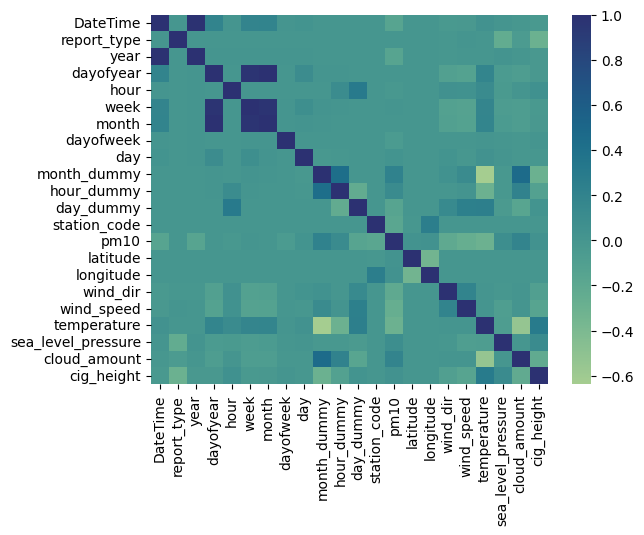

In [45]:
import seaborn as sn
sn.heatmap( final_data.corr(), cmap="crest")

In [46]:
final_data.drop(columns=['cig_height','report_type' ], inplace=True)

In [47]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import joblib

X = final_data.drop(columns=['pm10', 'DateTime'])  
y = final_data['pm10'].values.reshape(-1, 1)

scaler_xgb_X = StandardScaler()
scaler_xgb_y = StandardScaler()

X_xgb_scaled = scaler_xgb_X.fit_transform(X)
y_xgb_scaled = scaler_xgb_y.fit_transform(y)

# Save scalers
joblib.dump(scaler_xgb_X, "../../data/xgboost_data/scaler.joblib")
joblib.dump(scaler_xgb_y, "../../data/xgboost_data/scaler_y.joblib")

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X_xgb_scaled, y_xgb_scaled, test_size=0.2, shuffle=True
)

scaler_lstm_X = MinMaxScaler()
scaler_lstm_y = MinMaxScaler()



df_xgb_train = pd.DataFrame(X_train_xgb, columns=[f'feature_{i}' for i in range(X_train_xgb.shape[1])])
df_xgb_train['target'] = y_train_xgb
df_xgb_train.to_csv('../../data/xgboost_data/xgb_train_scaled.csv', index=False)


df_xgb_test = pd.DataFrame(X_test_xgb, columns=[f'feature_{i}' for i in range(X_test_xgb.shape[1])])
df_xgb_test['target'] = y_test_xgb
df_xgb_test.to_csv('../../data/xgboost_data/xgb_test_scaled.csv', index=False)




In [50]:
import pandas as pd
import json
df = pd.read_csv("C:/Users/Win10/AIRPPMHackathon/data/xgboost_data/xgb_train_scaled.csv")
feature_names = [col for col in df.columns if col != "target"]
with open("C:/Users/Win10/AIRPPMHackathon/data/xgboost_data/feature_names.json", "w") as f:
    json.dump({"feature_names": feature_names}, f)

print(pd.read_csv("C:/Users/Win10/AIRPPMHackathon/data/xgboost_data/xgb_train_scaled.csv").columns)

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'target'],
      dtype='object')


In [52]:
import pandas as pd

# Tên cột gốc do bạn cung cấp
original_feature_names = [
    "temperature", "wind_speed", "month_dummy", "wind_dir", "cloud_amount",
    "station_code", "day_dummy", "year", "hour_dummy", "sea_level_pressure",
    "dayofweek", "longitude", "latitude", "day", "hour", "week", "month", "dayofyear"
]

# Đọc lại CSV sau khi scale
df_scaled = pd.read_csv("C:/Users/Win10/AIRPPMHackathon/data/xgboost_data/xgb_train_scaled.csv")

# Đặt lại tên cột
df_scaled.columns = original_feature_names + ['target']

# Kiểm tra
print(df_scaled.columns)

df_scaled.to_csv("C:/Users/Win10/AIRPPMHackathon/data/xgboost_data/xgb_train_scaled_renamed.csv", index=False)


Index(['temperature', 'wind_speed', 'month_dummy', 'wind_dir', 'cloud_amount',
       'station_code', 'day_dummy', 'year', 'hour_dummy', 'sea_level_pressure',
       'dayofweek', 'longitude', 'latitude', 'day', 'hour', 'week', 'month',
       'dayofyear', 'target'],
      dtype='object')


In [ ]:
import pandas as pd
import json
df = pd.read_csv("C:/Users/Win10/AIRPPMHackathon/data/xgboost_data/xgb_train_scaled_renamed.csv")
feature_names = [col for col in df.columns if col != "target"]
with open("C:/Users/Win10/AIRPPMHackathon/data/xgboost_data/feature_names.json", "w") as f:
    json.dump({"feature_names": feature_names}, f)

print(pd.read_csv("C:/Users/Win10/AIRPPMHackathon/data/xgboost_data/xgb_train_scaled.csv").columns)

In [48]:
X_lstm_scaled = scaler_lstm_X.fit_transform(X)
y_lstm_scaled = scaler_lstm_y.fit_transform(y)

def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

train_size = int(len(X_lstm_scaled) * 0.8)

X_train_lstm_raw = X_lstm_scaled[:train_size]
y_train_lstm_raw = y_lstm_scaled[:train_size]

X_test_lstm_raw = X_lstm_scaled[train_size:]
y_test_lstm_raw = y_lstm_scaled[train_size:]

X_train_lstm, y_train_lstm = create_sequences(X_train_lstm_raw, y_train_lstm_raw, time_steps=10)
X_test_lstm, y_test_lstm = create_sequences(X_test_lstm_raw, y_test_lstm_raw, time_steps=10)

np.save("../../data/lstm_data/X_train_lstm.npy", X_train_lstm)
np.save("../../data/lstm_data/X_test_lstm.npy", X_test_lstm)
np.save("../../data/lstm_data/y_train_lstm.npy", y_train_lstm)
np.save("../../data/lstm_data/y_test_lstm.npy", y_test_lstm)